In [14]:
import THONKtools as THONK
import numpy as np
import pandas as pd
from uncertainties import ufloat
from uncertainties import unumpy as unp
import matplotlib.pylab as plt

In [37]:
data=pd.read_csv('measurements1',delimiter='\t',index_col=None)

In [38]:
data

,9.7,2266
0,12.7,2266
1,16.7,2265
2,20.2,2265
3,26.9,2261
4,27.8,2261
5,34.3,2260
6,35.5,2260


In [41]:
import numpy as np

with open ('measurements1','r') as myfile:
    dat=myfile.read().replace(',','.').replace('\n',',').replace('	',',')

datarray = dat.split(',')
array = np.array([float(i) for i in datarray[:-1]])

In [42]:
print(array)

[   9.7 2266.    12.7 2266.    16.7 2265.    20.2 2265.    26.9 2261.
   27.8 2261.    34.3 2260.    35.5 2260. ]


In [43]:
high=unp.uarray(array[0::4],0.5)
f=unp.uarray(array[1::4],0.5)
low=unp.uarray(array[2::4],0.5)

In [44]:
print(data.height[0::2])
height=np.array([12.2,15.6,21.6,26.8])

AttributeError: 'DataFrame' object has no attribute 'height'

In [45]:
#THONK.linreg(data.height,data.frequency)
#plt.show()

In [46]:
THONK.mean(data.frequency)

AttributeError: 'DataFrame' object has no attribute 'frequency'

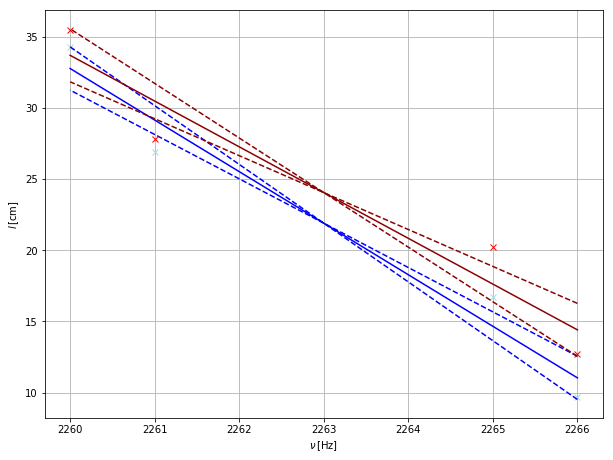

In [57]:
plt.plot(unp.nominal_values(f),unp.nominal_values(high),'x',color='lightblue')
THONK.linreg(unp.nominal_values(f),unp.nominal_values(high),color='blue')
plt.plot(unp.nominal_values(f),unp.nominal_values(low),'x',color='red')
THONK.linreg(unp.nominal_values(f),unp.nominal_values(low),color='darkred')
plt.grid()

fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7.5
plt.rcParams["figure.figsize"]=fig_size
plt.xlabel(r'$\nu\,[\mathrm{Hz}]$')
plt.ylabel(r'$l\,[\mathrm{cm}]$')

plt.show()

In [48]:
streuungh=np.std(unp.nominal_values(high))
streuungl=np.std(unp.nominal_values(low))
streuungf=np.std(unp.nominal_values(f))
print(streuungh)
print(streuungl)
print(streuungf)

9.415943925066673
8.497205422961128
2.5495097567963922


$$l=(2k+1)\frac{\lambda_k}{4}$$

In [50]:
k=np.linspace(0,4,4)
def lam(l,k):
    return 4*l/(2*k+1)
print(lam(high,k))

[38.8+/-2.0 18.21818181818182+/-0.5454545454545455
 16.989473684210527+/-0.31578947368421056
 15.244444444444444+/-0.2222222222222222]


In [58]:
print(f**(-1)*33000)

[14.563106796116505+/-0.0032133951447741627
 14.56953642384106+/-0.0032162332061459295
 14.5953118089341+/-0.003227623133333503
 14.601769911504425+/-0.003230480068916908]
